## Monte Carlo Implementation for Easy 21

Links  
Lecture series : http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html  
Assignment : http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/Easy21-Johannes.pdf  

In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
xk = np.arange(2)
pk = [1/float(3),2/float(3)]
CUSTOM_RANDOMIZE = stats.rv_discrete(values=(xk,pk))
CARD_COLOR = ['red','black']

In [3]:
def deal():
    # 0 is red and 1 is black
    cardColorIndex = CUSTOM_RANDOMIZE.rvs(size=1)
    return cardColorIndex, random.randint(1, 10)

In [4]:
def step(state,action):
    # state[0]- dealer's first card and state[1]- player's sum
    playerSum = state[1]
    dealerSum = state[0]
    
    if action == 0:
        # player action = stick
        print "stick: ",playerSum
        # dealer plays
        dealerSum = dealerPlaying(state[0])
        if dealerSum >21:
            return [dealerSum,playerSum],1
        elif dealerSum < playerSum:
            return [dealerSum,playerSum],1
        elif dealerSum == playerSum:
            return [dealerSum,playerSum],0
        elif dealerSum > playerSum:
            return [dealerSum,playerSum],-1  
    else:
        # player action = hit
        cardColorIndex, cardNumber = deal()
        #print cardColorIndex,cardNumber
        if cardColorIndex == 0:
            # subtract from sum
            playerSum-= cardNumber
        else:
            # add to sum
            playerSum += cardNumber
            
        if playerSum < 21 and playerSum > 1:
            return [dealerSum,playerSum],0
        else:
            return [dealerSum,playerSum],-1    

In [5]:
def dealerPlaying(dealerSum):
    
    while(dealerSum < 17 and dealerSum>=1 ):
        cardColorIndex, cardNumber = deal()
        #print dealerSum
        if cardColorIndex == 0:
            # subtract from sum
            dealerSum-= cardNumber
        else:
            # add to sum
            dealerSum+= cardNumber
    return dealerSum

In [6]:
dealerPlaying(15)

18

In [7]:
step([7,19],0)

stick:  19


([21, 19], -1)

In [8]:
def monteCarlo():
    q = np.zeros(21*10*2).reshape(10,21,2)
    n = np.zeros(21*10*2).reshape(10,21,2)
    
    for i in xrange(10000):
        dealerSumArr = []
        playerSumArr = []
        
        # Both of them draw a black card
        
        dealerSumArr.append(random.randint(1, 10))
        playerSumArr.append(random.randint(1, 10))
        
        ## play mofo
        reward=0
        while (reward==0):
            # next action random
            action = random.randint(0,1)
            
            dealerAndPlayerSum , reward = step( [dealerSumArr[0],playerSumArr[len(playerSumArr)-1]] ,action)
            
            n[ dealerSumArr[0]-1, playerSumArr[len(playerSumArr)-1]-1, action]+=1
            
            if reward == 0:
                playerSumArr.append(dealerAndPlayerSum[1])            
            if action==0:
                dealerSumArr.append(dealerAndPlayerSum[0])
        
        print i," -- ",dealerSumArr,playerSumArr,dealerAndPlayerSum[1],reward
        
        print "dealer: ",dealerSumArr[0], \
        "playerSum: ",playerSumArr[-1], \
        "action: ",action, \
        "n: ",n[ dealerSumArr[0]-1, playerSumArr[-1]-1, action]
        
        # Bellman equation
        value = q[ dealerSumArr[0]-1, playerSumArr[ -1]-1, action ] = \
        q[ dealerSumArr[0]-1, playerSumArr[len(playerSumArr)-1]-1, action] \
            + (1/n[ dealerSumArr[0]-1, playerSumArr[-1]-1, action])\
            *(reward- q[ dealerSumArr[0]-1, playerSumArr[-1]-1, action] )
            
        for playerSum in reversed(playerSumArr[:-1]):
            q[ dealerSumArr[0]-1, playerSum-1, 1] = value
    return q,n

In [9]:
#a =np.zeros(21*10*2).reshape(10,21,2)
#a[0,0,0]=1
#a[0,0][1]=2

In [10]:
q,n = monteCarlo()

stick:  16
0  --  [1, -5] [7, 16] 16 1
dealer:  1 playerSum:  16 action:  0 n:  1.0
1  --  [6] [7] 0 -1
dealer:  6 playerSum:  7 action:  1 n:  1.0
stick:  12
2  --  [10, -6] [8, 12] 12 1
dealer:  10 playerSum:  12 action:  0 n:  1.0
stick:  16
3  --  [8, 19] [8, 10, 16] 16 -1
dealer:  8 playerSum:  16 action:  0 n:  1.0
4  --  [3] [7] 0 -1
dealer:  3 playerSum:  7 action:  1 n:  1.0
5  --  [9] [5] 1 -1
dealer:  9 playerSum:  5 action:  1 n:  1.0
stick:  8
6  --  [4, 20] [5, 15, 11, 8] 8 -1
dealer:  4 playerSum:  8 action:  0 n:  1.0
stick:  10
7  --  [8, 0] [1, 7, 10] 10 1
dealer:  8 playerSum:  10 action:  0 n:  1.0
8  --  [9] [3, 13] 21 -1
dealer:  9 playerSum:  13 action:  1 n:  1.0
9  --  [8] [3] -1 -1
dealer:  8 playerSum:  3 action:  1 n:  1.0
10  --  [9] [5, 13] 22 -1
dealer:  9 playerSum:  13 action:  1 n:  2.0
stick:  6
11  --  [5, 0] [9, 6] 6 1
dealer:  5 playerSum:  6 action:  0 n:  1.0
stick:  1
12  --  [9, -1] [1] 1 1
dealer:  9 playerSum:  1 action:  0 n:  1.0
stick:  4


In [11]:
np.set_printoptions(suppress=True)
q

array([[[ 0.30769231,  0.23943662],
        [ 0.48387097,  0.33333333],
        [ 0.58139535,  0.25      ],
        [ 0.22857143,  0.83333333],
        [ 0.22807018,  0.25      ],
        [ 0.48648649,  0.27868852],
        [ 0.26153846,  0.24618981],
        [ 0.21621622,  0.22857143],
        [ 0.25      ,  0.5       ],
        [ 0.26027397,  0.        ],
        [ 0.33333333,  0.2962963 ],
        [ 0.        ,  1.        ],
        [ 0.        ,  0.83333333],
        [ 0.5       ,  0.41818182],
        [ 0.36363636,  0.05769231],
        [ 0.2       ,  0.36363636],
        [ 0.81481481,  0.26451613],
        [ 0.77142857,  0.64814815],
        [ 0.83333333,  0.11111111],
        [ 1.        ,  1.        ],
        [ 0.        ,  0.        ]],

       [[ 0.33333333,  0.05714286],
        [ 0.40740741,  0.08823529],
        [ 0.05714286,  0.96078431],
        [ 0.22222222,  0.3       ],
        [ 0.25373134,  0.06275946],
        [ 0.36111111,  0.45454545],
        [ 0.34375   ,  0.3

In [12]:
q.shape

(10, 21, 2)

In [13]:
q[:,:,1]

array([[ 0.23943662,  0.33333333,  0.25      ,  0.83333333,  0.25      ,
         0.27868852,  0.24618981,  0.22857143,  0.5       ,  0.        ,
         0.2962963 ,  1.        ,  0.83333333,  0.41818182,  0.05769231,
         0.36363636,  0.26451613,  0.64814815,  0.11111111,  1.        ,
         0.        ],
       [ 0.05714286,  0.08823529,  0.96078431,  0.3       ,  0.06275946,
         0.45454545,  0.34240363,  1.        ,  0.36842105,  0.91666667,
         0.34240363,  0.91666667,  0.09090909,  0.36842105,  0.81818182,
         0.81818182,  0.0989011 , -0.325     ,  0.5       ,  0.36842105,
         0.        ],
       [ 0.48484848,  0.28216063,  0.13333333, -0.02      ,  0.11779835,
         0.08196721, -0.02      ,  0.35416667,  0.31764706,  0.42857143,
         0.15789474,  0.13333333,  0.33333333,  0.578125  ,  0.13888889,
         0.5013986 ,  0.46753247,  0.43674507,  0.13888889,  0.27272727,
         0.        ],
       [ 0.06849315,  0.32135417,  0.3205819 ,  0.15384615

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

Z = q[:,:,1]

In [15]:
Z.T.shape

(21, 10)

In [16]:
Z.T

array([[ 0.23943662,  0.05714286,  0.48484848,  0.06849315, -0.52330023,
        -0.06119163, -0.        , -0.07471264, -0.59375   , -0.1025641 ],
       [ 0.33333333,  0.08823529,  0.28216063,  0.32135417,  0.2347561 ,
         0.47688356,  0.01052632,  0.02197802, -0.35211268, -0.26760563],
       [ 0.25      ,  0.96078431,  0.13333333,  0.3205819 ,  0.21451419,
         0.26428571, -0.75416667, -0.17142857, -0.26666667,  0.16402116],
       [ 0.83333333,  0.3       , -0.02      ,  0.15384615,  0.21451419,
         0.26428571,  0.05714286,  0.09090909, -0.15625   , -0.25      ],
       [ 0.25      ,  0.06275946,  0.11779835,  0.01196172,  0.21987952,
         0.1884058 , -0.07936508, -0.03402537, -0.60430195, -0.23287671],
       [ 0.27868852,  0.45454545,  0.08196721,  0.01196172,  0.23287671,
         0.36363636,  0.04347826, -0.03636364, -0.26666667, -0.46245059],
       [ 0.24618981,  0.34240363, -0.02      ,  0.42145594,  0.52941176,
         0.29824561,  0.17647059, -0.17142857

In [17]:
X = np.arange(21)
Y = np.arange(10)
X,Y = np.meshgrid(X,Y)

In [18]:
X

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18,

In [19]:
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

<IPython.core.display.Javascript object>


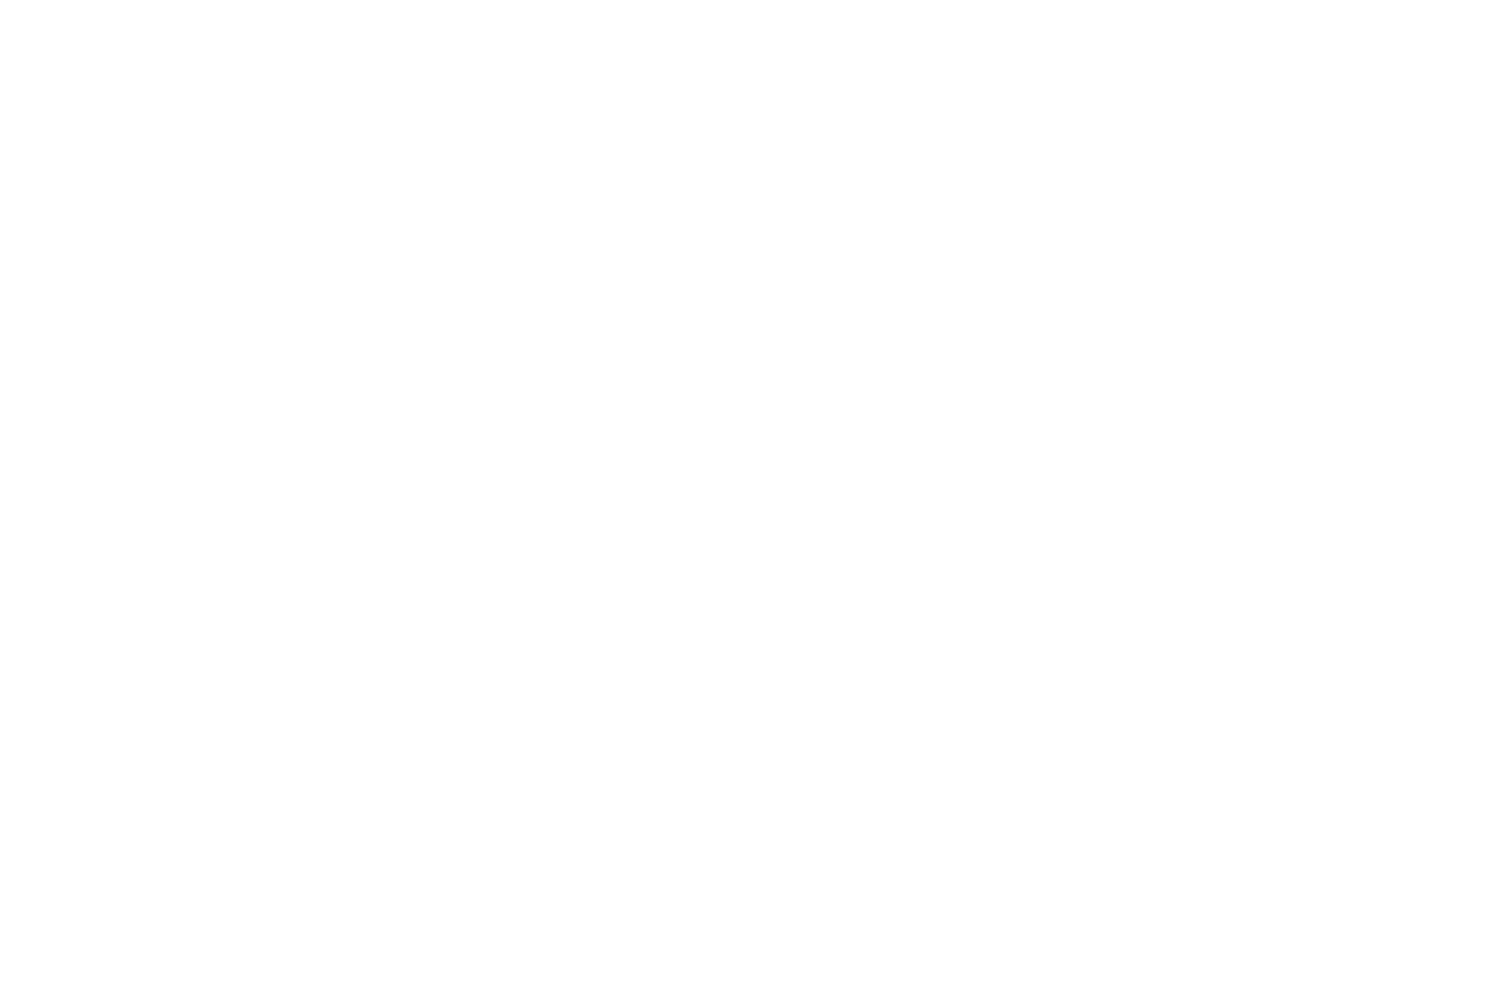

In [20]:
# use matplotlib 2.0
% matplotlib nbagg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

Z = q[:,:,1] # Policy for hit. To display policy for stick change 1 to 0
X = np.arange(21)
Y = np.arange(10)
X,Y = np.meshgrid(X,Y)

fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<IPython.core.display.Javascript object>


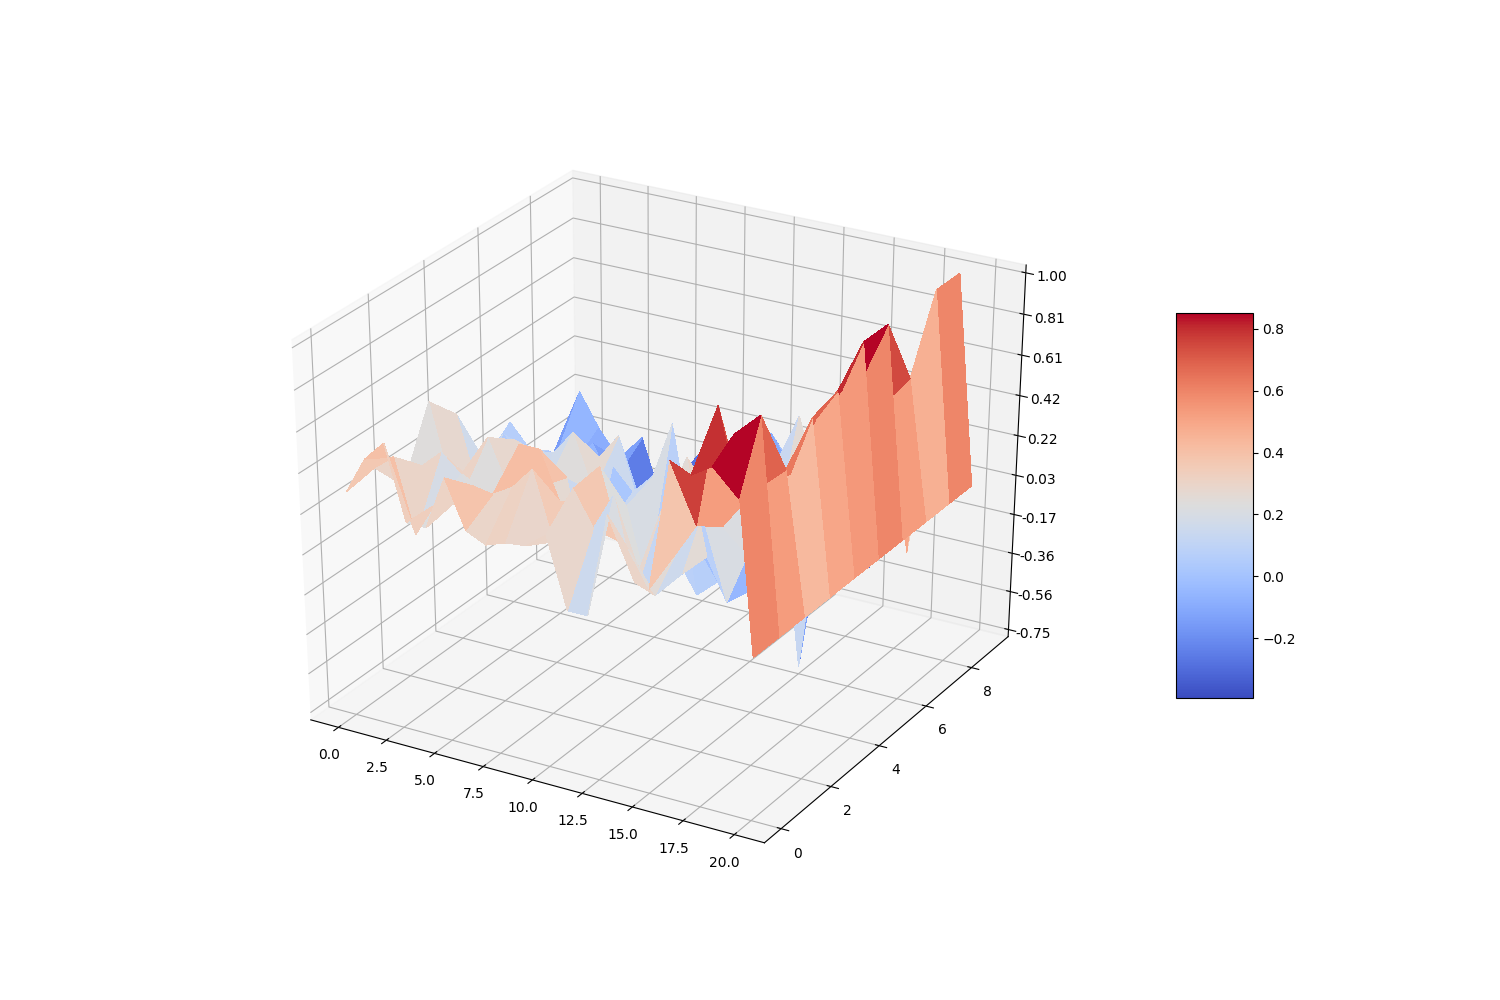

In [21]:
# use matplotlib 2.0
% matplotlib nbagg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

Z = q[:,:,0] # Policy for hit. To display policy for stick change 1 to 0
X = np.arange(21)
Y = np.arange(10)
X,Y = np.meshgrid(X,Y)

fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# CONCLUSION

From the diagrams above we can observe that the agent has learnt to stick when the player sum is more towards 21 and hit more at the start when it needs to increase the sum towards 21

## Let's Play


Face cards (kings, queens, and jacks) are counted as ten points. A player and the dealer can count an ace as 1 point or 11 points.


In [22]:
yourSum = 0
playerStop = False
global handNumber
handNumber = 0
# https://www.youtube.com/watch?v=idB-7FUaC-g
# play with my player's recommendation

In [23]:
def play( playerAction):
    global playerStop
    if playerAction == 1 and playerStop == False:
#         cardColorIndex, cardNumber = deal()
        return deal()
    else:
        playerStop = True
        print "Player stopped"

In [24]:
cardColorIndex, cardNumber = play(1)

In [25]:
cardColorIndex , cardNumber

(array([1]), 1)

In [26]:
import json

with open("q.json","w") as f:
    f.write("data = '"+(json.dumps(q.tolist()))+"'")

In [27]:
import ipywidgets as widgets
from ipywidgets import Button, Layout
from IPython.display import Image

In [30]:
from IPython.display import Javascript, display_javascript, HTML
from time import sleep

HTML(open("displayCards.html", "r").read())